In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [5]:
# y = k*x + b
# y = k_1*x_1 + k_2*x_2 + ... + b

X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])
X.shape

(2, 10)

In [7]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

1.Подберите скорость обучения (alpha) и количество итераций:

In [81]:
n = X.shape[1]
alpha_1 = 1e-4
alpha_2 = 1e-3
alpha_3 = 1e-2
W = np.array([1, 0.5])
errs = []
W, alpha_1, alpha_2, alpha_3

(array([1. , 0.5]), 0.0001, 0.001, 0.01)

0 [1.01102 0.534  ] 3173.15
10000 [31.64431213  6.78912647] 176.59523446839947
20000 [41.72163799  4.92827116] 62.26600944080188
30000 [45.28410632  4.27043414] 47.97810036432719
40000 [46.54348611  4.03788002] 46.192517144215635
50000 [46.98869356  3.95566906] 45.969369907004236
60000 [47.1460803   3.92660639] 45.941482834078
70000 [47.2017186   3.91633236] 45.9379977412482
80000 [47.22138748  3.91270035] 45.93756220353279
90000 [47.22834069  3.91141639] 45.9375077736766


Text(0, 0.5, 'errors')

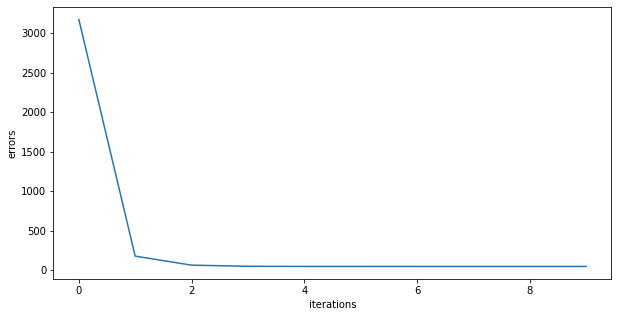

In [70]:
for i in range(100000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for j in range(W.shape[0]):
        W[j] -= alpha_1 * (1/n * 2 * np.sum(X[j] * (y_pred - y)))
    if i % 10000 == 0:
        errs.append(err)
        print(i, W, err) # Критерий остонова. Начиная с ошибки со значений 45.9375 изменения ошибки становятся очень маленькими.)
fig = plt.figure(figsize=(10, 5))
plt.plot(errs)
plt.xlabel('iterations')
plt.ylabel('errors')

In [73]:
for i in range(10000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for j in range(W.shape[0]):
        W[j] -= alpha_2 * (1/n * 2 * np.sum(X[j] * (y_pred - y)))
    if i % 1000 == 0:
        errs.append(err)
        print(i, W, err)

0 [1.1102 0.84  ] 3173.15
1000 [31.66648131  6.78503276] 176.46806566379882
2000 [41.73215361  4.92632937] 62.2342399245102
3000 [45.28877016  4.26957292] 47.97214782992787
4000 [46.54546925  4.03751382] 46.19152576288303
5000 [46.98951279  3.95551778] 45.96921511416331
6000 [47.14641166  3.92654521] 45.94145963171208
7000 [47.2018505  3.916308 ] 45.93799435998288
8000 [47.22143932  3.91269078] 45.937561720839334
9000 [47.22836086  3.91141266] 45.93750770584623


Text(0, 0.5, 'errors')

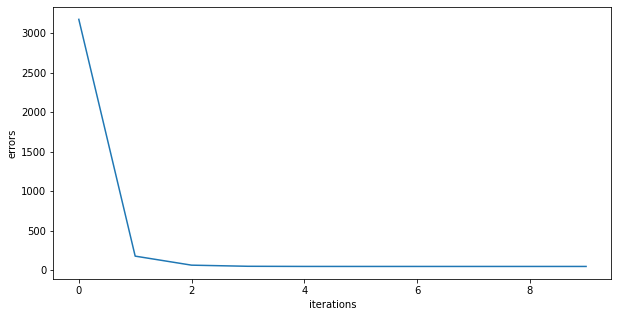

In [74]:
fig = plt.figure(figsize=(10, 5))
plt.plot(errs)
plt.xlabel('iterations')
plt.ylabel('errors')

In [82]:
for i in range(1001):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for j in range(W.shape[0]):
        W[j] -= alpha_3 * (1/n * 2 * np.sum(X[j] * (y_pred - y)))
    if i % 500 == 0:
        errs.append(err)
        print(i, W, err)

0 [2.102 3.9  ] 3173.15
500 [46.99760587  3.95402334] 45.96769776787538
1000 [47.23088237  3.91094704] 45.937500872219864


Text(0, 0.5, 'errors')

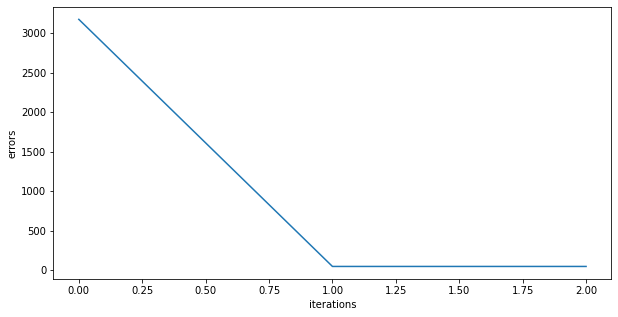

In [83]:
fig = plt.figure(figsize=(10, 5))
plt.plot(errs)
plt.xlabel('iterations')
plt.ylabel('errors')

Графики практически идентичны, однако при alpha = 0.01 требуется меньшее количество итераций. Программа работает быстрее.

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [29]:
for i in range(1000):
    y_pred = np.dot(W, X) 
    err = calc_mse(y, y_pred)  
    '''for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
        print(i,W)
       '''
    W -= (alpha_2 * (2/n * np.dot((y_pred - y), X.T)))
    if i % 200 == 0:
        print(i, W, err)

0 [2.102 3.9  ] 3173.15
200 [41.83683774  4.90699865] 61.9177717428135
400 [46.56511152  4.03388672] 46.181755648107604
600 [47.14967657  3.92594232] 45.941233404700036
800 [47.2219474   3.91259695] 45.93755706443538
